# Import Libaries

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

from skimage import filters

(-0.5, 219.5, 219.5, -0.5)

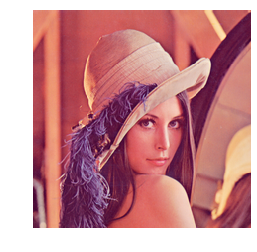

In [2]:
image = Image.open("lena.png")
plt.imshow(image)
plt.axis("off")

In [3]:
#np.array(image)

In [4]:
print("Format:", image.format)
print("Size:", image.size)
print("Mode:", image.mode)

Format: PNG
Size: (220, 220)
Mode: RGB


(-0.5, 219.5, 219.5, -0.5)

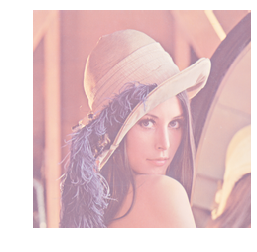

In [5]:
#alpha to indicate the transparency, and the value of alpha indicates the percentage of transparency
plt.imshow(image, alpha=0.5)

# save the same image with 50% transparency
plt.savefig("lena_a.png")
plt.axis("off")

In [6]:
image_a = Image.open("lena_a.png")

# Check the new format, size, and mode of the image
print("Format:", image_a.format)
print("Size:", image_a.size)
print("Mode:", image_a.mode)

Format: PNG
Size: (432, 288)
Mode: RGBA


# Invert Image Colour

(-0.5, 219.5, 219.5, -0.5)

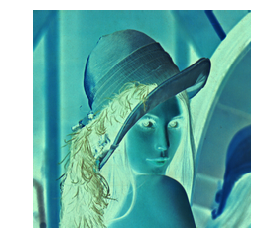

In [11]:
image1 = image.copy()

for col in range(image1.width):
    for row in range(image1.height):
        # get the coordinates (for pixel values)
        coords = (col, row)
        
        pixel = image1.getpixel(coords)
        
        # if red == 255, invert_red == 0
        # if red = 254, invert_red == 1
        # (Subtract the current red value with 255)
        
        invert_colours = ()
        for colour in pixel:
            invert_colours += (255 - colour,)
            
        image1.putpixel(coords, invert_colours)
        

plt.imshow(image1)
plt.axis("off")

In [8]:
pixel

# (R, G, B)
# (182, 71, 80)

(182, 71, 80)

# Black and White

(-0.5, 219.5, 219.5, -0.5)

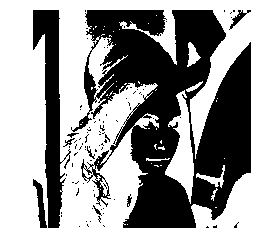

In [13]:
image2 = image.copy()

for col in range(image2.width):
    for row in range(image2.height):
        coords = (col, row)
        pixel = image2.getpixel(coords)
        
        avg = sum(pixel)/3
        
        if avg > 128:
            avg = 0
        else:
            avg = 255
            
        image2.putpixel(coords, ((avg,)*3))
        
        
plt.imshow(image2)
plt.axis('off')

# Grayscale

(-0.5, 219.5, 219.5, -0.5)

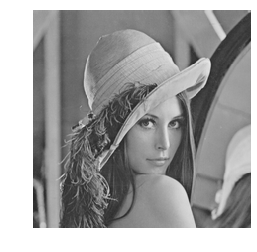

In [15]:
image3 = image.copy()

for col in range(image3.width):
    for row in range(image3.height):
        coords = (col, row)
        pixel = image3.getpixel(coords)
        
        # for grayscale we'll just need to average the pixels
        # in image processing it is important to convert the pixel values as int instead of float
        avg = int(sum(pixel)/3)
            
        image3.putpixel(coords, ((avg,)*3))
        
        
plt.imshow(image3)
plt.axis('off')

# Image Mirroring

(-0.5, 219.5, 219.5, -0.5)

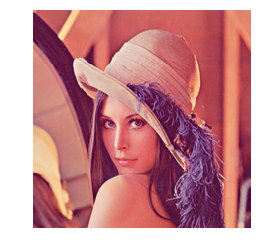

In [20]:
# invert everything on the right to the left, and vice versa, invert everything on the left to the right

image4 = image.copy()

for col in range(image4.width):
    for row in range(image4.height):
        coords = (col, row)
        
        #flipping the pixels to the other side
        mirr = (image4.width - col - 1, row)
        
        #reference the original image not the copied image
        pixel = image.getpixel(mirr)
        
        image4.putpixel(coords, pixel)
        
plt.imshow(image4)
plt.axis('off')

# Horizontal Flip

(-0.5, 219.5, 219.5, -0.5)

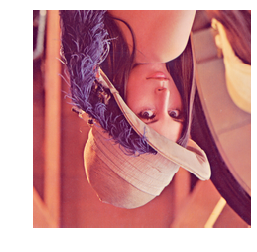

In [24]:
image5 = image.copy()

for col in range(image5.width):
    for row in range(image5.height):
        coords = (col, row)
        
        #change the rows
        flip = (col, image5.height - row - 1)
        pixel = image.getpixel(flip)
        
        image5.putpixel(coords, pixel)
        
plt.imshow(image5)
plt.axis('off')

# Contrast Image

(-0.5, 219.5, 219.5, -0.5)

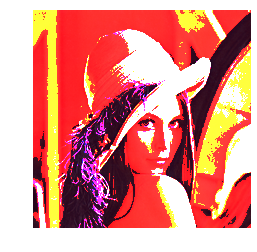

In [28]:
# highlighting features of the image

image6 = image.copy()

for col in range(image6.width):
    for row in range(image6.height):
        coords = (col, row)
        pixel = image.getpixel(coords)
        
        contrast = ()
        for colour in pixel:
            if colour < 128:
                colour = int(colour / 2)
            else:
                colour = colour * 2
                
                # cap the pixel values at 255 because it does not make sense for it to be greater than 255
                if colour > 255:
                    colour = 255
                    
            contrast += (colour,)
            
        contrast += (pixel[-1],)
        image6.putpixel(coords, contrast)
        
plt.imshow(image6)
plt.axis('off')

# Image Detection

In [30]:
from skimage import io, feature
from skimage.color import rgb2gray

# Many prebuilt models available on skimage. Check out its documentation.
image_ = rgb2gray(io.imread("lena.png"))

In [31]:
image_

array([[0.60776078, 0.60692745, 0.59874902, ..., 0.62093216, 0.64921725,
        0.54356431],
       [0.60776078, 0.60412196, 0.59874902, ..., 0.63241412, 0.6688102 ,
        0.56006902],
       [0.60801373, 0.59596627, 0.59621137, ..., 0.52115804, 0.45677608,
        0.31792118],
       ...,
       [0.17051843, 0.17777333, 0.1772    , ..., 0.24205725, 0.30669216,
        0.31783098],
       [0.15707922, 0.1699451 , 0.16655137, ..., 0.30393922, 0.34975412,
        0.34524431],
       [0.14812   , 0.17805608, 0.16151373, ..., 0.34421843, 0.36595333,
        0.37347608]])

# Canny Algorithmn

(-0.5, 219.5, 219.5, -0.5)

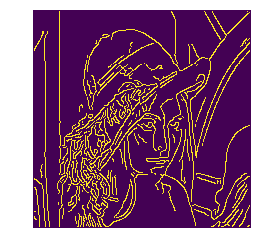

In [33]:
edge_canny = feature.canny(image_)
plt.imshow(edge_canny)
plt.axis('off')

# Filters: Prewitt

(-0.5, 219.5, 219.5, -0.5)

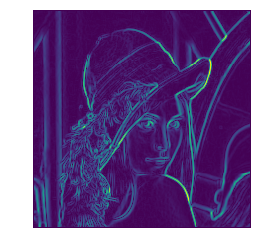

In [36]:
edge_prewitt = filters.prewitt(image_)
plt.imshow(edge_prewitt)
plt.axis('off')